In [1]:
import os
import sys
import keras
import numpy as np
import tensorflow as tf
from keras import datasets
import matplotlib
import matplotlib.pyplot as plt

sys.path.append(os.getcwd() + "/../")

import bfcnn

In [2]:
# setup environment
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "3"
tf.compat.v1.enable_eager_execution
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

In [3]:
# setup variables
LEVELS = 5
INPUT_SHAPE = (None, None, 1)
RANDOM_BATCH_SIZE = (1, 256, 256, 1)
GAUSSIAN_CONFIG = {
    "levels": LEVELS,
    "type": "gaussian",
    "xy_max": [2.0, 2.0],
    "kernel_size": [5, 5]
}
LAPLACIAN_CONFIG = {
    "levels": LEVELS,
    "type": "laplacian",
    "xy_max": [2.0, 2.0],
    "kernel_size": [5, 5]
}
INVERSE_LAPLACIAN_CONFIG = {
    "levels": LEVELS,
    "type": "inverse_laplacian",
    "xy_max": [2.0, 2.0],
    "kernel_size": [5, 5]
}

In [4]:
# create input for pyramids
x = \
    tf.random.truncated_normal(
        seed=0,
        mean=0.0,
        stddev=1,
        shape=RANDOM_BATCH_SIZE).numpy()

In [5]:
gaussian_pyramid_model = \
    bfcnn.build_pyramid_model(
        input_dims=INPUT_SHAPE,
        config=GAUSSIAN_CONFIG)

x_pyramid = gaussian_pyramid_model.predict(x)

In [6]:
for i in range(LEVELS):
    mean = np.mean(x_pyramid[i])
    print("mean: {0}".format(mean))

mean: 0.0014863539254292846
mean: 0.001884625293314457
mean: 0.001976409461349249
mean: 0.0021490890067070723
mean: 0.0019694920629262924


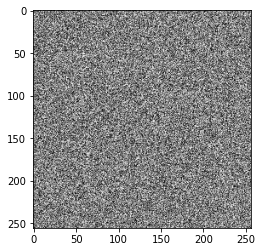

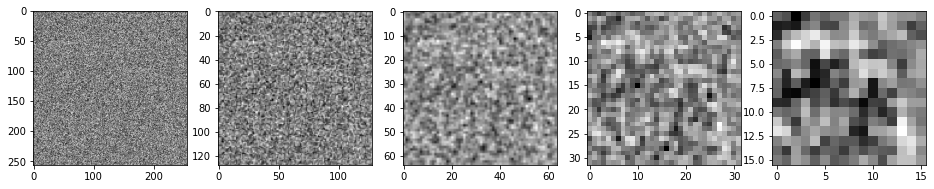

In [7]:
# draw test samples, predictions and diff
plt.figure(figsize=(4,4))
plt.imshow(x[0,:,:,0], cmap="gray_r") 

plt.figure(figsize=(16,8))
for i in range(LEVELS):
    x_pyramid_level = x_pyramid[i]
    plt.subplot(1, LEVELS, i+1)
    plt.imshow(x_pyramid_level[0,:,:,0], cmap="gray_r") 
plt.show() 

In [8]:
laplacian_pyramid_model = \
    bfcnn.build_pyramid_model(
        input_dims=INPUT_SHAPE,
        config=LAPLACIAN_CONFIG)

inverse_laplacian_pyramid_model = \
    bfcnn.build_pyramid_model(
        input_dims=INPUT_SHAPE,
        config=INVERSE_LAPLACIAN_CONFIG)

x_pyramid = laplacian_pyramid_model.predict(x)

x_recovered = inverse_laplacian_pyramid_model.predict(x_pyramid)

x_error = x_recovered - x

In [9]:
for i in range(LEVELS):
    mean = np.mean(x_pyramid[i])
    print("mean: {0}".format(mean))

mean: -0.00031049337121658027
mean: -0.00013780646258965135
mean: -0.0001142637847806327
mean: -0.00021563118207268417
mean: 0.0021333848126232624


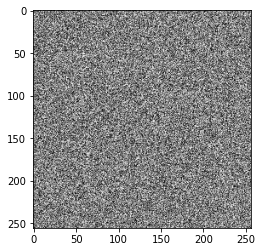

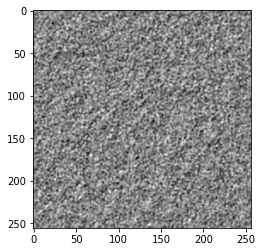

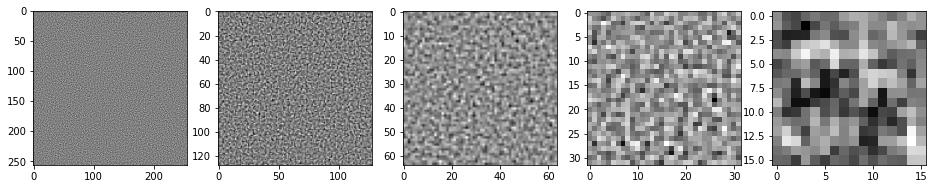

In [10]:
# draw test samples, predictions and diff
plt.figure(figsize=(4,4))
plt.imshow(x[0,:,:,0], cmap="gray_r") 

plt.figure(figsize=(4,4))
plt.imshow(x_error[0,:,:,0], cmap="gray_r") 

plt.figure(figsize=(16,8))
for i in range(LEVELS):
    x_pyramid_level = x_pyramid[i]
    plt.subplot(1, LEVELS, i+1)
    plt.imshow(x_pyramid_level[0,:,:,0], cmap="gray_r") 
plt.show() 

# Model config

In [11]:
model_config = {
    "filters": 16,
    "no_layers": 5,
    "min_value": 0,
    "max_value": 255,
    "kernel_size": 3,
    "type": "resnet",
    "batchnorm": True,
    "clip_values": False,
    "activation": "relu",
    "local_normalization": -1,
    "output_multiplier": 1.0,
    "kernel_regularizer": "l1",
    "final_activation": "tanh",
    "input_shape": ["?", "?", 1],
    "intermediate_results": True,
    "kernel_initializer": "glorot_normal",
    "pyramid": {
      "levels": 5,
      "type": "laplacian",
      "xy_max": [2.0, 2.0],
      "kernel_size": [5, 5]
    },
    "inverse_pyramid": {
      "levels": 5,
      "type": "inverse_laplacian",
      "xy_max": [2.0, 2.0],
      "kernel_size": [5, 5]
    }
}

In [12]:
model_denoise, model_normalize, model_denormalize = bfcnn.model_builder(config=model_config)

2022-02-11 14:36:03,880 INFO model_denoise.py:model_builder:31] building model with config [{'filters': 16, 'no_layers': 5, 'min_value': 0, 'max_value': 255, 'kernel_size': 3, 'type': 'resnet', 'batchnorm': True, 'clip_values': False, 'activation': 'relu', 'local_normalization': -1, 'output_multiplier': 1.0, 'kernel_regularizer': 'l1', 'final_activation': 'tanh', 'input_shape': ['?', '?', 1], 'intermediate_results': True, 'kernel_initializer': 'glorot_normal', 'pyramid': {'levels': 5, 'type': 'laplacian', 'xy_max': [2.0, 2.0], 'kernel_size': [5, 5]}, 'inverse_pyramid': {'levels': 5, 'type': 'inverse_laplacian', 'xy_max': [2.0, 2.0], 'kernel_size': [5, 5]}}]
2022-02-11 14:36:03,903 INFO model_denoise.py:model_builder:145] building model with multiscale pyramid


In [13]:
model_denoise.save("model_denoise.h5")